In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import joblib
import sys,os
from pathlib import Path
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from joblib import load

In [2]:
#file = Path().resolve().parents[0] / "data" / "lille_2022.csv"
file = Path().resolve().parents[0] / "data" / "bordeaux_2022.csv"
df = pd.read_csv(file)
df.columns = df.columns.str.strip()

In [3]:
root_path=Path().resolve().parents[0]

In [4]:
df_filtered = df[df['Nombre pieces principales'] == 4]
df.head(10)

,Identifiant de document,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,prix_m2
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2022,Vente,...,0,1.0,Maison,NaN,71.0,4,S,NaN,70.0,5577.464789
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,05/01/2022,Vente,...,1,2.0,Appartement,NaN,40.0,1,NaN,NaN,NaN,3962.500000
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,07/01/2022,Vente,...,1,3.0,Dépendance,NaN,0.0,0,NaN,NaN,NaN,inf
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,07/01/2022,Vente,...,1,2.0,Appartement,NaN,35.0,1,NaN,NaN,NaN,5342.857143
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,07/01/2022,Vente,...,1,3.0,Dépendance,NaN,0.0,0,NaN,NaN,NaN,inf
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,0,1.0,Maison,NaN,65.0,3,S,NaN,45.0,4807.692308
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,07/01/2022,Vente,...,1,3.0,Dépendance,NaN,0.0,0,NaN,NaN,NaN,inf
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,05/01/2022,Vente,...,1,2.0,Appartement,NaN,20.0,1,NaN,NaN,NaN,5800.000000
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,05/01/2022,Vente,...,1,2.0,Appartement,NaN,71.0,1,NaN,NaN,NaN,4211.267606
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,05/01/2022,Vente,...,1,3.0,Dépendance,NaN,0.0,0,NaN,NaN,NaN,inf


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 44 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Identifiant de document     0 non-null      float64
 1   Reference document          0 non-null      float64
 2   1 Articles CGI              0 non-null      float64
 3   2 Articles CGI              0 non-null      float64
 4   3 Articles CGI              0 non-null      float64
 5   4 Articles CGI              0 non-null      float64
 6   5 Articles CGI              0 non-null      float64
 7   No disposition              13200 non-null  int64  
 8   Date mutation               13200 non-null  object 
 9   Nature mutation             13200 non-null  object 
 10  Valeur fonciere             13200 non-null  float64
 11  No voie                     13155 non-null  float64
 12  B/T/Q                       402 non-null    object 
 13  Type de voie                131

In [6]:
df_filtered.describe()

,Identifiant de document,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Valeur fonciere,No voie,...,3eme lot,4eme lot,5eme lot,Nombre de lots,Code type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Surface terrain,prix_m2
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1071.000000,1.071000e+03,1071.000000,...,17.000000,6.000000,2.00000,1071.000000,1071.000000,0.0,1071.000000,1071.0,447.000000,1071.000000
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.004669,5.162909e+05,104.997199,...,19.235294,24.666667,6.50000,0.777778,1.619048,NaN,95.051354,4.0,290.078300,5354.677348
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.080748,4.627169e+05,617.928491,...,23.109872,30.878256,2.12132,0.795496,0.485848,NaN,24.372080,0.0,886.691993,4452.179206
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000e+00,1.000000,...,3.000000,4.000000,5.00000,0.000000,1.000000,NaN,30.000000,4.0,38.000000,0.008333
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,3.080000e+05,15.000000,...,5.000000,6.000000,5.75000,0.000000,1.000000,NaN,79.500000,4.0,120.000000,3654.248573
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,4.200000e+05,34.000000,...,7.000000,7.500000,6.50000,1.000000,2.000000,NaN,90.000000,4.0,169.000000,4600.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,5.730000e+05,82.000000,...,33.000000,34.500000,7.25000,1.000000,2.000000,NaN,108.500000,4.0,264.500000,5790.569620
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,7.500000e+06,9097.000000,...,79.000000,80.000000,8.00000,6.000000,2.000000,NaN,252.000000,4.0,10897.000000,68181.818182


In [7]:
df_house=df_filtered[df_filtered['Type local'].str.contains("Maison")==True]
df_apartment=df_filtered[df_filtered['Type local'].str.contains("Appartement")==True]

In [8]:
df_house.describe()

,Identifiant de document,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Valeur fonciere,No voie,...,3eme lot,4eme lot,5eme lot,Nombre de lots,Code type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Surface terrain,prix_m2
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,408.000000,4.080000e+02,408.000000,...,1.0,0.0,0.0,408.000000,408.0,0.0,408.000000,408.0,386.000000,408.000000
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.012255,5.505339e+05,162.713235,...,9.0,NaN,NaN,0.071078,1.0,NaN,100.134804,4.0,204.295337,5509.101169
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.130570,2.875424e+05,993.658798,...,NaN,NaN,NaN,0.324808,0.0,NaN,26.013963,0.0,129.491536,2308.811392
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,6.862000e+03,1.000000,...,9.0,NaN,NaN,0.000000,1.0,NaN,42.000000,4.0,38.000000,70.742268
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,4.000000e+05,16.000000,...,9.0,NaN,NaN,0.000000,1.0,NaN,82.000000,4.0,116.250000,4470.616883
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,5.100000e+05,31.500000,...,9.0,NaN,NaN,0.000000,1.0,NaN,96.000000,4.0,166.000000,5267.942584
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,6.394375e+05,67.000000,...,9.0,NaN,NaN,0.000000,1.0,NaN,115.000000,4.0,251.750000,6205.833727
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,3.663324e+06,9097.000000,...,9.0,NaN,NaN,3.000000,1.0,NaN,210.000000,4.0,973.000000,32708.245536


In [9]:
df_apartment.describe()

,Identifiant de document,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Valeur fonciere,No voie,...,3eme lot,4eme lot,5eme lot,Nombre de lots,Code type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Surface terrain,prix_m2
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,663.0,6.630000e+02,663.000000,...,16.000000,6.000000,2.00000,663.000000,663.0,0.0,663.000000,663.0,61.000000,663.000000
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.952183e+05,69.479638,...,19.875000,24.666667,6.50000,1.212670,2.0,NaN,91.923077,4.0,832.901639,5259.647304
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5.422770e+05,82.575677,...,23.711811,30.878256,2.12132,0.678782,0.0,NaN,22.766352,0.0,2321.583746,5360.727387
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.000000e+00,1.000000,...,3.000000,4.000000,5.00000,0.000000,2.0,NaN,30.000000,4.0,61.000000,0.008333
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.728750e+05,13.000000,...,5.000000,6.000000,5.75000,1.000000,2.0,NaN,77.000000,4.0,140.000000,3344.830380
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.631600e+05,37.000000,...,6.500000,7.500000,6.50000,1.000000,2.0,NaN,87.000000,4.0,249.000000,4165.951220
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.225000e+05,99.000000,...,34.000000,34.500000,7.25000,2.000000,2.0,NaN,102.000000,4.0,400.000000,5279.625524
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,7.500000e+06,474.000000,...,79.000000,80.000000,8.00000,6.000000,2.0,NaN,252.000000,4.0,10897.000000,68181.818182


In [10]:
#keep specifi culumn 
df_house=df_house[['Surface reelle bati','Nombre pieces principales','Type local','Surface terrain','Nombre de lots','Valeur fonciere','prix_m2']]
df_apartment=df_apartment[['Surface reelle bati','Nombre pieces principales','Type local','Nombre de lots','Valeur fonciere','prix_m2']]


In [11]:
df_house=df_house.dropna()
df_apartment=df_apartment.dropna()


print(df_house.shape[0])
print(df_apartment.shape[0]) 

386
663


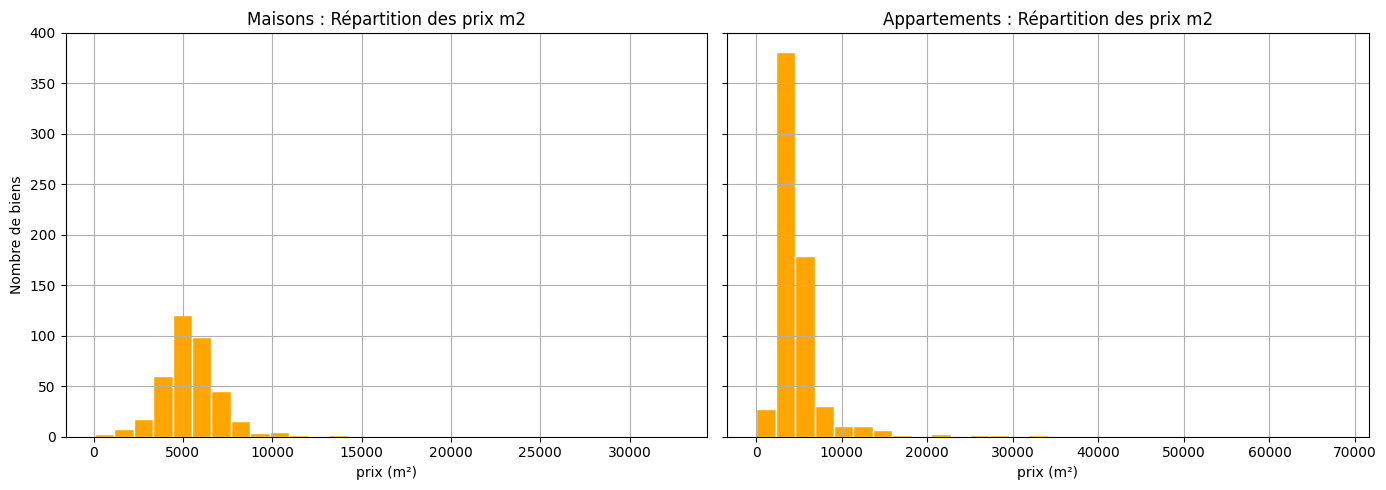

In [12]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 5), sharey=True)

# Histogramme des maisons
axes[0].hist(df_house['prix_m2'], bins=30, color='orange', edgecolor='w')
axes[0].set_title("Maisons : Répartition des prix m2")
axes[0].set_xlabel("prix (m²)")
axes[0].set_ylabel("Nombre de biens")
axes[0].grid(True)

# Histogramme des appartements
axes[1].hist(df_apartment['prix_m2'], bins=30, color='orange', edgecolor='w')
axes[1].set_title("Appartements : Répartition des prix m2")
axes[1].set_xlabel("prix (m²)")
axes[1].grid(True)

plt.tight_layout()
plt.show()

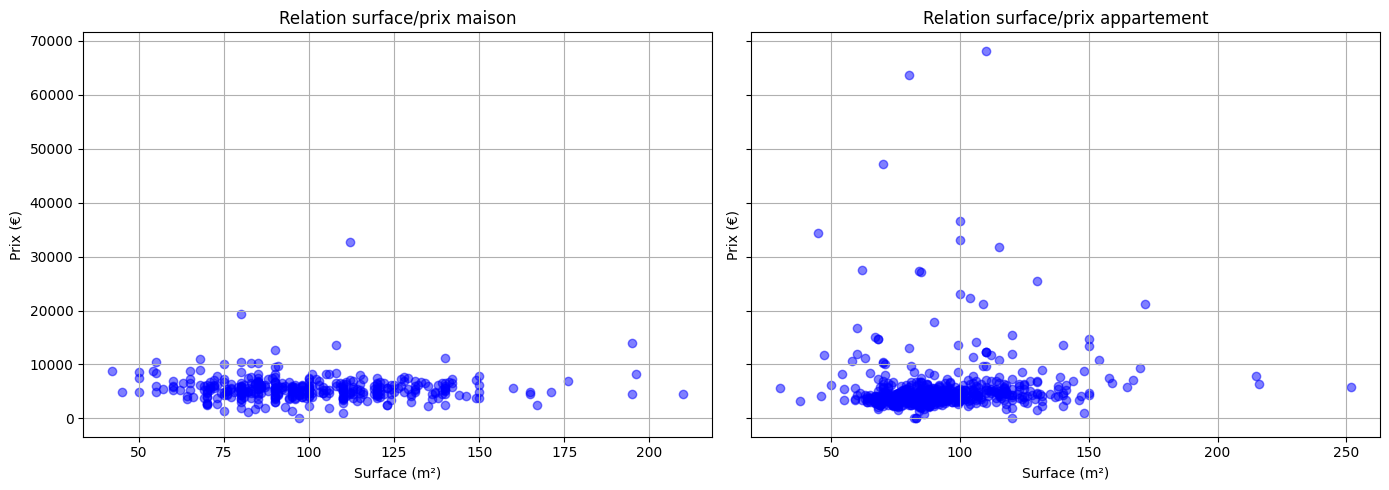

In [13]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 5), sharey=True)

# nuage de point des maison
axes[0].scatter(df_house['Surface reelle bati'], df_house['prix_m2'], color='blue', alpha=0.5)
axes[0].set_title("Relation surface/prix maison")
axes[0].set_xlabel("Surface (m²)")
axes[0].set_ylabel("Prix (€)")
axes[0].grid(True)

# nuage de point des appartements
axes[1].scatter(df_apartment['Surface reelle bati'], df_apartment['prix_m2'], color='blue', alpha=0.5)
axes[1].set_title("Relation surface/prix appartement")
axes[1].set_xlabel("Surface (m²)")
axes[1].set_ylabel("Prix (€)")
axes[1].grid(True)

plt.tight_layout()
plt.show()

## Outlier

In [14]:
def detect_outliers(df, column):
    # Calcul du 1er quartile (25 % des valeurs les plus basses)
    Q1 = df[column].quantile(0.25)
    
    # Calcul du 3e quartile (75 % des valeurs les plus basses)
    Q3 = df[column].quantile(0.75)
    
    # Calcul de l'écart interquartile (zone "normale" des données)
    IQR = Q3 - Q1
    
    # Définition de la borne inférieure (valeurs trop basses)
    lower_bound = Q1 - 1.5 * IQR
    
    # Définition de la borne supérieure (valeurs trop hautes)
    upper_bound = Q3 + 1.5 * IQR
    
    # Retourne un tuple contenant :
    # - la borne inférieure des valeurs acceptables,
    # - la borne supérieure des valeurs acceptables,
    # - les lignes du DataFrame où les valeurs de la colonne spécifiée sont considérées comme des outliers (hors bornes)
    return (
        lower_bound, 
        upper_bound, 
        df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        )



In [15]:
print("Outliers prix maison :\n", detect_outliers(df_house, "prix_m2")[2], "\n")
print("Outliers prix appartement:\n", detect_outliers(df_apartment, "prix_m2")[2], "\n")

Outliers prix maison :
        Surface reelle bati  Nombre pieces principales Type local  \
530                  195.0                          4     Maison   
631                   83.0                          4     Maison   
968                   85.0                          4     Maison   
1103                  68.0                          4     Maison   
1786                  75.0                          4     Maison   
3527                  82.0                          4     Maison   
3750                  95.0                          4     Maison   
4132                  87.0                          4     Maison   
5484                  80.0                          4     Maison   
5624                  91.0                          4     Maison   
6108                  75.0                          4     Maison   
6447                 140.0                          4     Maison   
6689                  68.0                          4     Maison   
8994                 106

Delete outlier

In [16]:
# Si nécessaire, exclure les outliers pour des variable spécifiques
lower_bound, upper_bound, _ = detect_outliers(df_house, "prix_m2")
df_house = df_house[~((df_house["prix_m2"] < lower_bound) | (df_house["prix_m2"] > upper_bound))]

lower_bound, upper_bound, _ = detect_outliers(df_apartment, "prix_m2")
df_apartment = df_apartment[~((df_apartment["prix_m2"] < lower_bound) | (df_apartment["prix_m2"] > upper_bound))]

In [17]:
print(df_house.shape[0])
print(df_apartment.shape[0]) 

362
606


In [18]:
model_appt = load("../models/model_regression_apartement.pkl")
scaler_X_appt = load("../models/scaler_X_apartement.pkl")

model_house = load("../models/model_regression_house.pkl")
scaler_X_house = load("../models/scaler_X_house.pkl")

In [22]:
# -------- Pour les appartements -------- 
features = ["Nombre de lots","Surface reelle bati"]
X_appt = df_apartment[features].values
y_appt = df_apartment["prix_m2"].values

X_appt_scaled = scaler_X_appt.transform(X_appt)
y_pred_appt = model_appt.predict(X_appt_scaled)

mse_appt = mean_squared_error(y_appt, y_pred_appt)
print(f"[Appartements] MSE Bordeaux : {mse_appt:.2f}")

# -------- Pour les maisons --------
features2 = ["Surface terrain","Surface reelle bati"]
X_house = df_house[features2].values
y_house = df_house["prix_m2"].values

X_house_scaled = scaler_X_house.transform(X_house)
y_pred_house = model_house.predict(X_house_scaled)

mse_house = mean_squared_error(y_house, y_pred_house)
print(f"[Maisons] MSE Bordeaux : {mse_house:.2f}")

[Appartements] MSE Bordeaux : 2072203.86
[Maisons] MSE Bordeaux : 7590886.36


## lille Data

In [23]:
file = Path().resolve().parents[0] / "data" / "lille_2022.csv"

df_lille = pd.read_csv(file)
df_lille.columns = df.columns.str.strip()

df_house_lille=df_filtered[df_filtered['Type local'].str.contains("Maison")==True]
df_apartment_lille=df_filtered[df_filtered['Type local'].str.contains("Appartement")==True]

df_house_lille=df_house[['Surface reelle bati','Nombre pieces principales','Type local','Surface terrain','Nombre de lots','Valeur fonciere','prix_m2']]
df_apartment_lille=df_apartment[['Surface reelle bati','Nombre pieces principales','Type local','Nombre de lots','Valeur fonciere','prix_m2']]

df_house_lille=df_house.dropna()
df_apartment_lille=df_apartment.dropna()

print(df_house_lille.shape[0])
print(df_apartment_lille.shape[0]) 

print("Outliers prix maison :\n", detect_outliers(df_house_lille, "prix_m2")[2], "\n")
print("Outliers prix appartement:\n", detect_outliers(df_apartment_lille, "prix_m2")[2], "\n")

# Si nécessaire, exclure les outliers pour des variable spécifiques
lower_bound, upper_bound, _ = detect_outliers(df_house_lille, "prix_m2")
df_house_lille = df_house_lille[~((df_house_lille["prix_m2"] < lower_bound) | (df_house_lille["prix_m2"] > upper_bound))]

lower_bound, upper_bound, _ = detect_outliers(df_apartment_lille, "prix_m2")
df_apartment_lille = df_apartment_lille[~((df_apartment_lille["prix_m2"] < lower_bound) | (df_apartment_lille["prix_m2"] > upper_bound))]

print(df_house_lille.shape[0])
print(df_apartment_lille.shape[0]) 

362
606
Outliers prix maison :
        Surface reelle bati  Nombre pieces principales Type local  \
2875                  50.0                          4     Maison   
3881                  42.0                          4     Maison   
7925                  80.0                          4     Maison   
8102                  93.0                          4     Maison   
10208                 65.0                          4     Maison   
13105                 54.0                          4     Maison   

       Surface terrain  Nombre de lots  Valeur fonciere      prix_m2  
2875             102.0               0         433000.0  8660.000000  
3881             297.0               0         369000.0  8785.714286  
7925             419.0               0         694078.0  8675.975000  
8102             135.0               0         190794.0  2051.548387  
10208            253.0               0         570000.0  8769.230769  
13105            440.0               0         470000.0  8703.703

In [26]:
# -------- Pour les appartements -------- 
features = ["Nombre de lots","Surface reelle bati"]
X_appt_lille = df_apartment_lille[features].values
y_appt_lille = df_apartment_lille["prix_m2"].values

X_appt_scaled_lille = scaler_X_appt.transform(X_appt_lille)
y_pred_appt_lille = model_appt.predict(X_appt_scaled_lille)

mse_appt_lille = mean_squared_error(y_appt_lille, y_pred_appt_lille)
print(f"[Appartements] MSE Bordeaux : {mse_appt_lille:.2f}")

# -------- Pour les maisons --------
features2 = ["Surface terrain","Surface reelle bati"]
X_house_lille = df_house_lille[features2].values
y_house_lille = df_house_lille["prix_m2"].values

X_house_scaled_lille = scaler_X_house.transform(X_house_lille)
y_pred_maison_lille = model_house.predict(X_house_scaled_lille)

mse_house_lille = mean_squared_error(y_house_lille, y_pred_maison_lille)
print(f"[Maisons] MSE Bordeaux : {mse_house_lille:.2f}")

[Appartements] MSE Bordeaux : 1798019.01
[Maisons] MSE Bordeaux : 7305456.00


In [27]:
print("---- Comparaison avec Lille ----")
print("MSE Appartements Lille :", mse_appt_lille)
print("MSE Appartements Bordeaux :", mse_appt)
print("MSE Maisons Lille :", mse_house_lille)
print("MSE Maisons Bordeaux :", mse_house)

---- Comparaison avec Lille ----
MSE Appartements Lille : 1798019.0050857347
MSE Appartements Bordeaux : 2072203.856337785
MSE Maisons Lille : 7305456.001356462
MSE Maisons Bordeaux : 7590886.355529617


In [28]:
delta_appt = 100 * (mse_appt - mse_appt_lille) / mse_appt_lille
delta_house = 100 * (mse_house - mse_house_lille) / mse_house_lille
print(f"Écart Appartements : {delta_appt:.2f}%")
print(f"Écart Maisons : {delta_house:.2f}%")

Écart Appartements : 15.25%
Écart Maisons : 3.91%


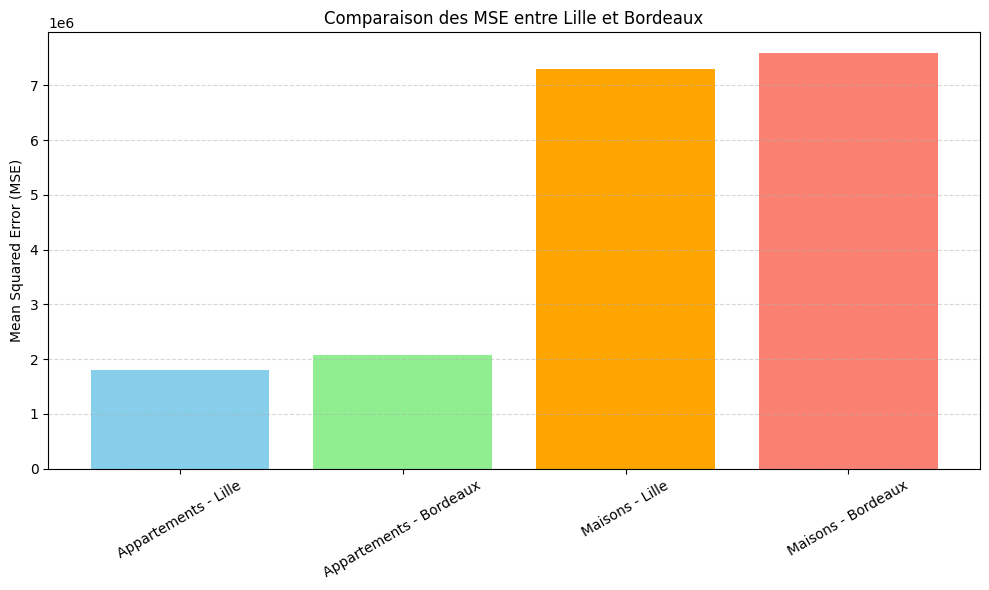

In [29]:
# MSE Lille et Bordeaux (à adapter si noms différents)
mse_data = {
    "Appartements - Lille": mse_appt_lille,
    "Appartements - Bordeaux": mse_appt,
    "Maisons - Lille": mse_house_lille,
    "Maisons - Bordeaux": mse_house
}

# Barplot
plt.figure(figsize=(10, 6))
plt.bar(mse_data.keys(), mse_data.values(), color=["skyblue", "lightgreen", "orange", "salmon"])
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Comparaison des MSE entre Lille et Bordeaux")
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

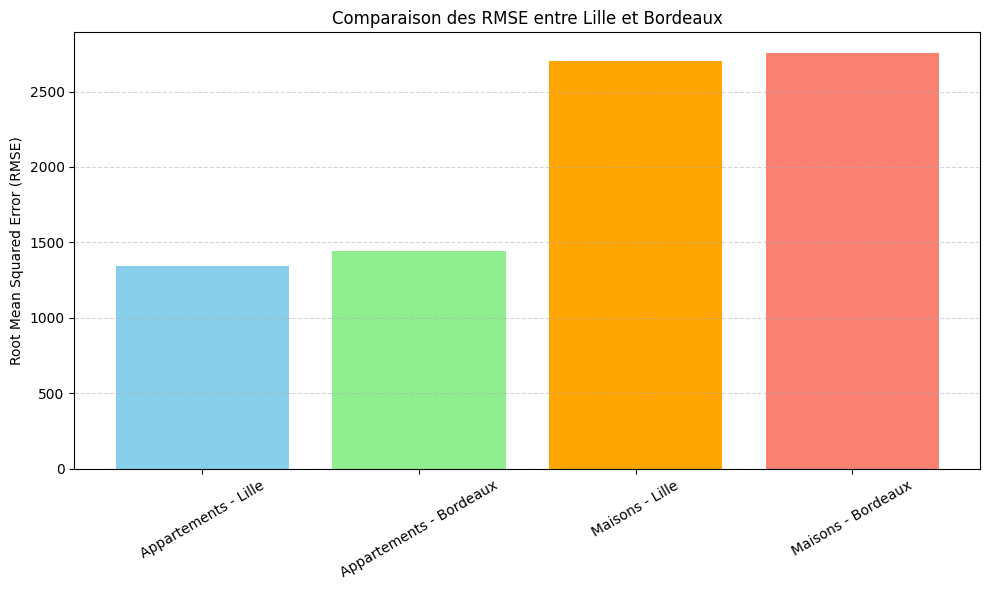

In [30]:
# RMSE = √MSE
rmse_data = {
    "Appartements - Lille": np.sqrt(mse_appt_lille),
    "Appartements - Bordeaux": np.sqrt(mse_appt),
    "Maisons - Lille": np.sqrt(mse_house_lille),
    "Maisons - Bordeaux": np.sqrt(mse_house)
}

plt.figure(figsize=(10, 6))
plt.bar(rmse_data.keys(), rmse_data.values(), color=["skyblue", "lightgreen", "orange", "salmon"])
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.title("Comparaison des RMSE entre Lille et Bordeaux")
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [31]:
# -------- Préparation des données --------
features_appt = ["Nombre de lots","Surface reelle bati"] 
features_house = ["Surface terrain","Surface reelle bati"]

# Appartements Bordeaux
X_appt_bx = df_apartment[features_appt].values
y_appt_bx = df_apartment["prix_m2"].values
X_appt_bx_scaled = scaler_X_appt.transform(X_appt_bx)
y_pred_appt_bx = model_appt.predict(X_appt_bx_scaled)

# Appartements Lille
X_appt_lille = df_apartment_lille[features_appt].values
y_appt_lille = df_apartment_lille["prix_m2"].values
X_appt_lille_scaled = scaler_X_appt.transform(X_appt_lille)
y_pred_appt_lille = model_appt.predict(X_appt_lille_scaled)

# Maisons Bordeaux
X_house_bx = df_house[features_house].values
y_house_bx = df_house["prix_m2"].values
X_house_bx_scaled = scaler_X_house.transform(X_house_bx)
y_pred_house_bx = model_house.predict(X_house_bx_scaled)

# Maisons Lille
X_house_lille = df_house_lille[features_house].values
y_house_lille = df_house_lille["prix_m2"].values
X_house_lille_scaled = scaler_X_house.transform(X_house_lille)
y_pred_house_lille = model_house.predict(X_house_lille_scaled)

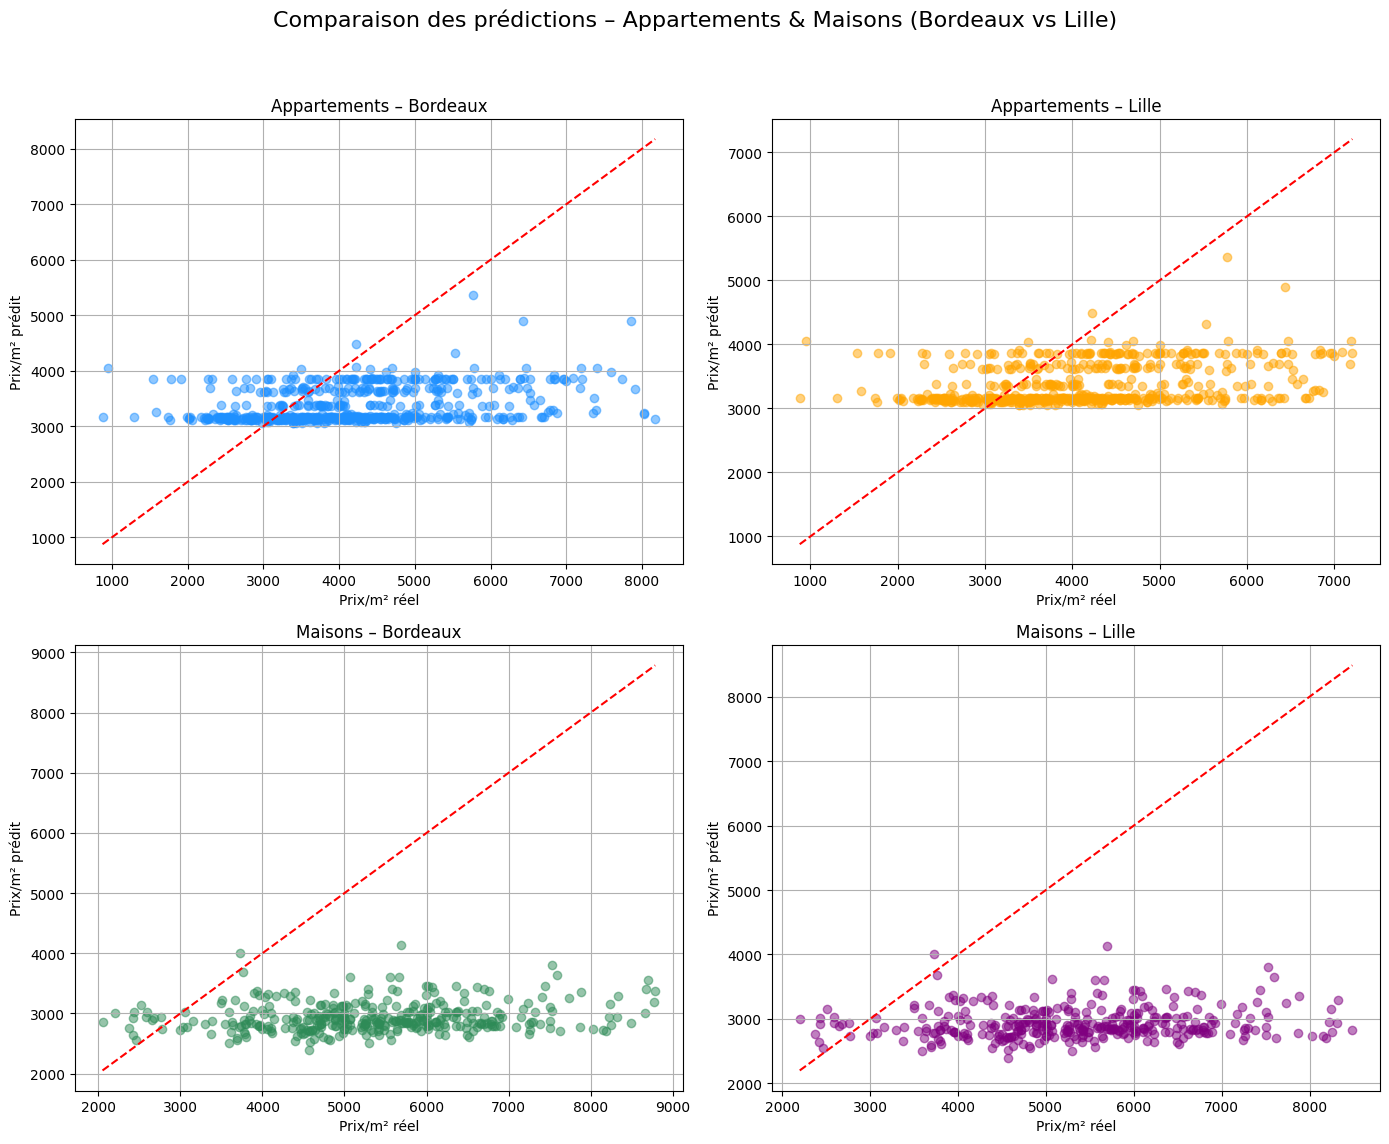

In [32]:
# --------- Visualisation 2x2 ---------
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Appartements - Bordeaux
axes[0, 0].scatter(y_appt_bx, y_pred_appt_bx, alpha=0.5, color="dodgerblue")
axes[0, 0].plot([min(y_appt_bx), max(y_appt_bx)], [min(y_appt_bx), max(y_appt_bx)], 'r--')
axes[0, 0].set_title("Appartements – Bordeaux")
axes[0, 0].set_xlabel("Prix/m² réel")
axes[0, 0].set_ylabel("Prix/m² prédit")
axes[0, 0].grid(True)

# Appartements - Lille
axes[0, 1].scatter(y_appt_lille, y_pred_appt_lille, alpha=0.5, color="orange")
axes[0, 1].plot([min(y_appt_lille), max(y_appt_lille)], [min(y_appt_lille), max(y_appt_lille)], 'r--')
axes[0, 1].set_title("Appartements – Lille")
axes[0, 1].set_xlabel("Prix/m² réel")
axes[0, 1].set_ylabel("Prix/m² prédit")
axes[0, 1].grid(True)

# Maisons - Bordeaux
axes[1, 0].scatter(y_house_bx, y_pred_house_bx, alpha=0.5, color="seagreen")
axes[1, 0].plot([min(y_house_bx), max(y_house_bx)], [min(y_house_bx), max(y_house_bx)], 'r--')
axes[1, 0].set_title("Maisons – Bordeaux")
axes[1, 0].set_xlabel("Prix/m² réel")
axes[1, 0].set_ylabel("Prix/m² prédit")
axes[1, 0].grid(True)

# Maisons - Lille
axes[1, 1].scatter(y_house_lille, y_pred_house_lille, alpha=0.5, color="purple")
axes[1, 1].plot([min(y_house_lille), max(y_house_lille)], [min(y_house_lille), max(y_house_lille)], 'r--')
axes[1, 1].set_title("Maisons – Lille")
axes[1, 1].set_xlabel("Prix/m² réel")
axes[1, 1].set_ylabel("Prix/m² prédit")
axes[1, 1].grid(True)

plt.suptitle("Comparaison des prédictions – Appartements & Maisons (Bordeaux vs Lille)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [33]:
def print_metrics(y_true, y_pred, label):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{label} → RMSE : {rmse:.2f} | MSE : {mse:.2f} | R² : {r2:.2%}")
    return rmse, r2, mse

rmse_r2_data = {}

rmse, r2, _ = print_metrics(y_appt_bx, y_pred_appt_bx, "Appartements Bordeaux")
rmse_r2_data["Appartements Bordeaux"] = {"rmse": rmse, "r2": r2}

rmse, r2, _ = print_metrics(y_appt_lille, y_pred_appt_lille, "Appartements Lille")
rmse_r2_data["Appartements Lille"] = {"rmse": rmse, "r2": r2}

rmse, r2, _ = print_metrics(y_house_bx, y_pred_house_bx, "Maisons Bordeaux")
rmse_r2_data["Maisons Bordeaux"] = {"rmse": rmse, "r2": r2}

rmse, r2, _ = print_metrics(y_house_lille, y_pred_house_lille, "Maisons Lille")
rmse_r2_data["Maisons Lille"] = {"rmse": rmse, "r2": r2}

Appartements Bordeaux → RMSE : 1439.52 | MSE : 2072203.86 | R² : -29.28%
Appartements Lille → RMSE : 1340.90 | MSE : 1798019.01 | R² : -28.84%
Maisons Bordeaux → RMSE : 2755.16 | MSE : 7590886.36 | R² : -334.53%
Maisons Lille → RMSE : 2702.86 | MSE : 7305456.00 | R² : -360.61%


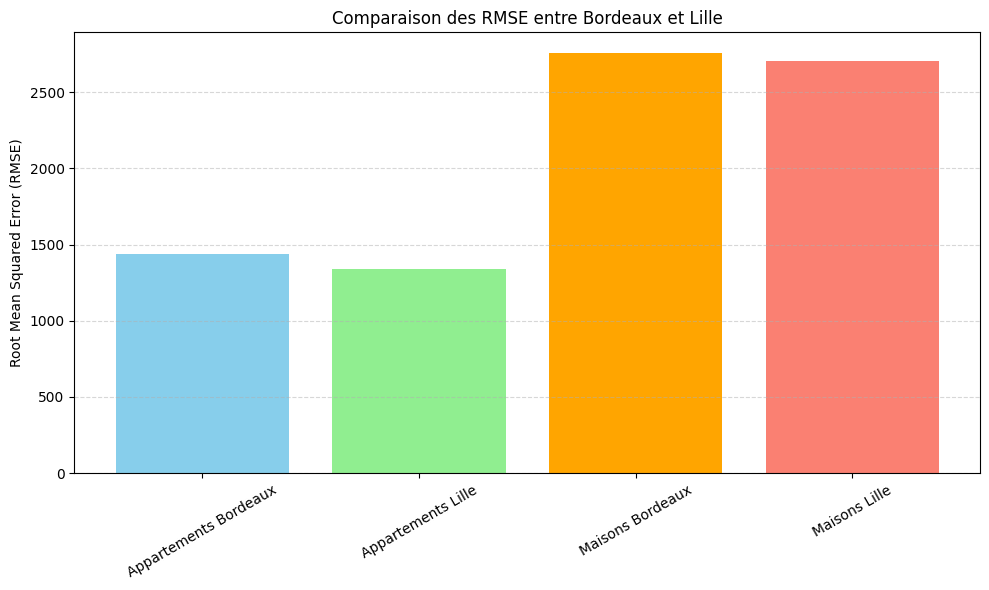

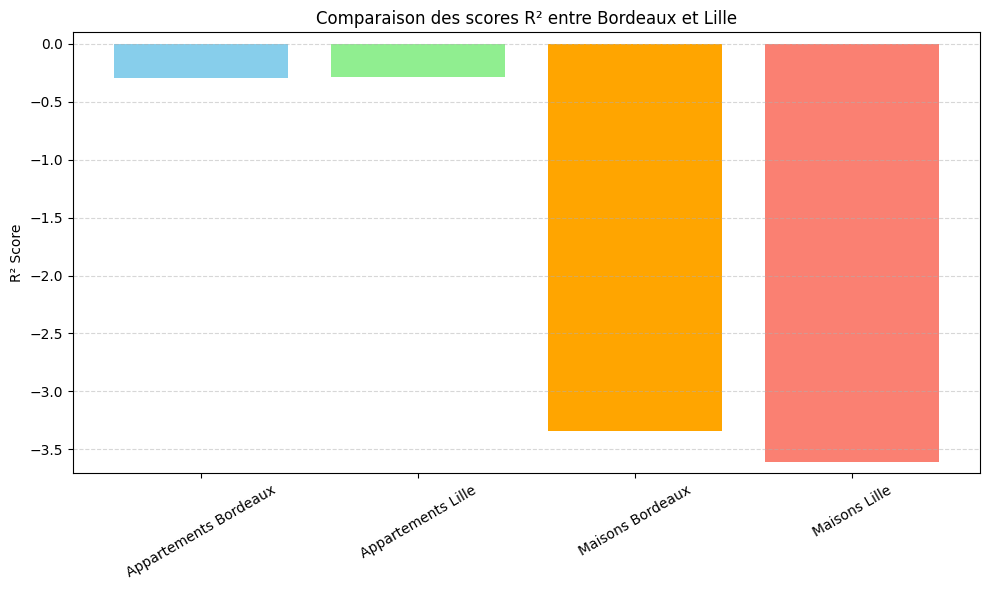

In [34]:
# Données pour les barplots
labels = list(rmse_r2_data.keys())
rmse_values = [rmse_r2_data[lab]["rmse"] for lab in labels]
r2_values = [rmse_r2_data[lab]["r2"] for lab in labels]

colors = ["skyblue", "lightgreen", "orange", "salmon"]

# Barplot RMSE
plt.figure(figsize=(10, 6))
plt.bar(labels, rmse_values, color=colors)
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.title("Comparaison des RMSE entre Bordeaux et Lille")
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Barplot R²
plt.figure(figsize=(10, 6))
plt.bar(labels, r2_values, color=colors)
plt.ylabel("R² Score")
plt.title("Comparaison des scores R² entre Bordeaux et Lille")
plt.xticks(rotation=30)
plt.ylim(min(r2_values) - 0.1, 0.1)  # adapté aux R² négatifs
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()